## Step 1

Using Sklearn get the Boston Housing dataset. Fit a linear regressor to the data as a baeline. There is no need to do Cross-Validation. We are exploring the change in results

What is the loss and what are the goodness of fit parameters? This will be our baseline for comparison

In [1]:
# Reference: https://towardsdatascience.com/linear-regression-on-boston-housing-dataset-f409b7e4a155

In [2]:
import numpy as np
import matplotlib.pyplot as plt 

import pandas as pd  
import seaborn as sns 
from prettytable import PrettyTable

from sklearn.pipeline import Pipeline
from sklearn.preprocessing import Imputer
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression, LogisticRegression
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score
from sklearn import datasets, linear_model
from sklearn.datasets import load_boston

import random


%matplotlib inline

In [3]:
boston_dataset = load_boston()

In [4]:
print(boston_dataset.keys())

dict_keys(['data', 'target', 'feature_names', 'DESCR', 'filename'])


In [5]:
print(boston_dataset.DESCR)

.. _boston_dataset:

Boston house prices dataset
---------------------------

**Data Set Characteristics:**  

    :Number of Instances: 506 

    :Number of Attributes: 13 numeric/categorical predictive. Median Value (attribute 14) is usually the target.

    :Attribute Information (in order):
        - CRIM     per capita crime rate by town
        - ZN       proportion of residential land zoned for lots over 25,000 sq.ft.
        - INDUS    proportion of non-retail business acres per town
        - CHAS     Charles River dummy variable (= 1 if tract bounds river; 0 otherwise)
        - NOX      nitric oxides concentration (parts per 10 million)
        - RM       average number of rooms per dwelling
        - AGE      proportion of owner-occupied units built prior to 1940
        - DIS      weighted distances to five Boston employment centres
        - RAD      index of accessibility to radial highways
        - TAX      full-value property-tax rate per $10,000
        - PTRATIO  pu

In [6]:
boston = pd.DataFrame(boston_dataset.data, columns=boston_dataset.feature_names)
boston.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33


In [7]:
boston['MEDV'] = boston_dataset.target
boston.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33,36.2


In [8]:
boston.isnull().sum()

CRIM       0
ZN         0
INDUS      0
CHAS       0
NOX        0
RM         0
AGE        0
DIS        0
RAD        0
TAX        0
PTRATIO    0
B          0
LSTAT      0
MEDV       0
dtype: int64

/Users/kjprice/anaconda3/envs/python3.6/lib/python3.6/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


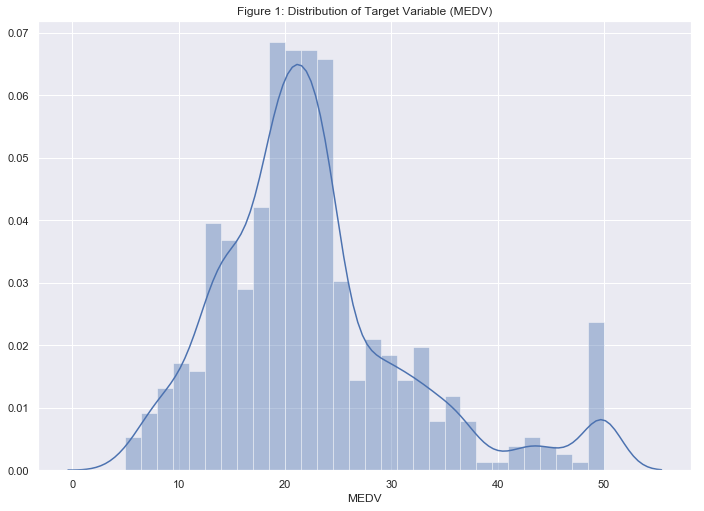

In [9]:
sns.set(rc={'figure.figsize':(11.7,8.27)})
sns.distplot(boston['MEDV'], bins=30)

plt.title("Figure 1: Distribution of Target Variable (MEDV)")
plt.show()

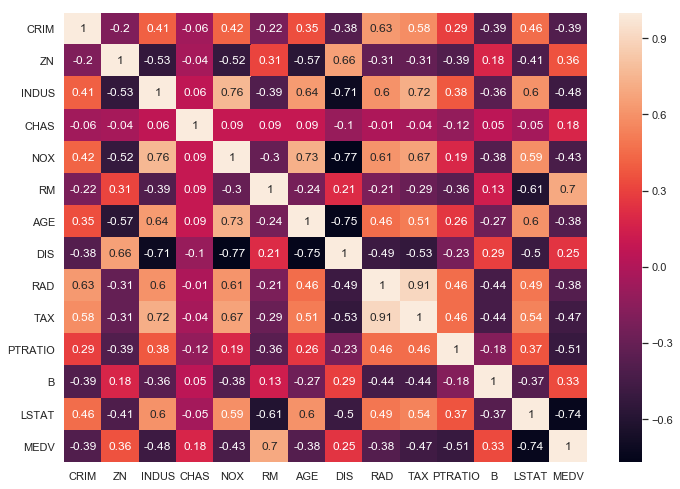

In [10]:
correlation_matrix = boston.corr().round(2)
sns.heatmap(data=correlation_matrix, annot=True)

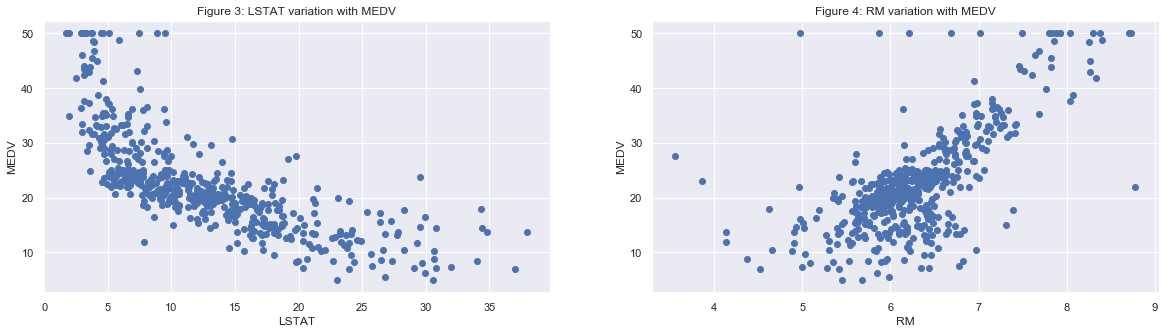

In [11]:
plt.figure(figsize=(20, 5))

features = ['LSTAT', 'RM']
target = boston['MEDV']

for i, col in enumerate(features):
    plt.subplot(1, len(features) , i+1)
    x = boston[col]
    y = target
    plt.scatter(x, y, marker='o')
    plt.title(col)
    plt.xlabel(col)
    plt.ylabel('MEDV')
    plt.title('Figure '+ str(i+3) + ': ' + str(features[i]) + ' variation with MEDV')
    
# prices are increasing as RM increases linearly
# prices are decreasing when LSTAT is increasing. not as linear

In [12]:
X = pd.DataFrame(np.c_[boston['LSTAT'], boston['RM']], columns = ['LSTAT','RM'])
Y = boston['MEDV']

In [13]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.2, random_state=5)
print(X_train.shape)
print(X_test.shape)
print(Y_train.shape)
print(Y_test.shape)

(404, 2)
(102, 2)
(404,)
(102,)


In [14]:
lin_model = LinearRegression()
lin_model.fit(X_train, Y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False)

In [15]:

# model evaluation for training set
y_train_predict = lin_model.predict(X_train)
rmse_train = (np.sqrt(mean_squared_error(Y_train, y_train_predict)))
r2_train = r2_score(Y_train, y_train_predict)

print("The model performance for training set")
print("--------------------------------------")
print('RMSE is {}'.format(rmse_train))
print('R2 score is {}'.format(r2_train))
print("\n")

# model evaluation for testing set
y_test_predict = lin_model.predict(X_test)
rmse_test = (np.sqrt(mean_squared_error(Y_test, y_test_predict)))
r2_test = r2_score(Y_test, y_test_predict)

print("The model performance for testing set")
print("--------------------------------------")
print('RMSE is {}'.format(rmse_test))
print('R2 score is {}'.format(r2_test))

The model performance for training set
--------------------------------------
RMSE is 5.6371293350711955
R2 score is 0.6300745149331701


The model performance for testing set
--------------------------------------
RMSE is 5.137400784702911
R2 score is 0.6628996975186953


In [16]:
# RMSE = loss
# R2 = goodness of fit

## Step 2

(repeated) For select between 1, 5 10, 20, 33, and 50% of your data on a single column (Completely at random), replace the present value with a NAN and then perform an imputation of that value.

In. each case perform a fit with the imputed data and compare the loss and goodness of fit to your baseline.

(note to KJ and Festus: I'm sure there's a way I could have done this with a for loop or something? didn't figure that out quickly so just did it manually since there were only 6 of them.)

In [17]:
# reference: https://datascience.stackexchange.com/questions/30245/is-there-a-way-to-replace-existing-values-with-nan
# replaces a percentage of values with NaN completely at random

def dropout(a, percent):
    # create a copy
    mat = a.copy()
    # number of values to replace
    prop = int(mat.size * percent)
    # indices to mask
    mask = random.sample(range(mat.size), prop)
    # replace with NaN
    np.put(mat, mask, [np.NaN]*len(mask))
    return mat

In [18]:
# replace 1 % of RM with NaN
boston1 = boston.copy()
data1 = boston1['RM']
modified1 = dropout(data1, 0.01)
boston1['RM'] = modified1
# print(boston1.isnull().sum())

# replacing all the NaNs in column RM with the average RM
boston1["RM"].fillna(boston1["RM"].mean(), inplace=True)

# now fit regression 

X1 = pd.DataFrame(np.c_[boston1['LSTAT'], boston1['RM']], columns = ['LSTAT','RM'])
Y1 = boston1['MEDV']
X1_train, X1_test, Y1_train, Y1_test = train_test_split(X1, Y1, test_size = 0.2, random_state=5)

lin_model = LinearRegression()
lin_model.fit(X1_train, Y1_train)

y1_train_predict = lin_model.predict(X1_train)
rmse_train1 = (np.sqrt(mean_squared_error(Y1_train, y1_train_predict)))
r2_train1 = r2_score(Y1_train, y1_train_predict)

# model evaluation for testing set
y1_test_predict = lin_model.predict(X1_test)
rmse_test1 = (np.sqrt(mean_squared_error(Y1_test, y1_test_predict)))
r2_test1 = r2_score(Y1_test, y1_test_predict)

In [19]:
# replace 5 % of RM with NaN
boston5 = boston.copy()
data5 = boston5['RM']
modified5 = dropout(data5, 0.05)
boston5['RM'] = modified5
boston5.isnull().sum()

# replacing all the NaNs in column RM with the average RM
boston5["RM"].fillna(boston5["RM"].mean(), inplace=True)

# now fit regression 

X5 = pd.DataFrame(np.c_[boston5['LSTAT'], boston5['RM']], columns = ['LSTAT','RM'])
Y5 = boston5['MEDV']
X5_train, X5_test, Y5_train, Y5_test = train_test_split(X5, Y5, test_size = 0.2, random_state=5)

lin_model = LinearRegression()
lin_model.fit(X5_train, Y5_train)

y5_train_predict = lin_model.predict(X5_train)
rmse_train5 = (np.sqrt(mean_squared_error(Y5_train, y5_train_predict)))
r2_train5 = r2_score(Y5_train, y5_train_predict)

# model evaluation for testing set
y5_test_predict = lin_model.predict(X5_test)
rmse_test5 = (np.sqrt(mean_squared_error(Y5_test, y5_test_predict)))
r2_test5 = r2_score(Y5_test, y5_test_predict)

In [20]:
# replace 10 % of RM with NaN
boston10 = boston.copy()
data10 = boston10['RM']
modified10 = dropout(data10, 0.1)
boston10['RM'] = modified10
boston10.isnull().sum()

# replacing all the NaNs in column RM with the average RM
boston10["RM"].fillna(boston10["RM"].mean(), inplace=True)

# now fit regression 

X10 = pd.DataFrame(np.c_[boston10['LSTAT'], boston10['RM']], columns = ['LSTAT','RM'])
Y10 = boston10['MEDV']
X10_train, X10_test, Y10_train, Y10_test = train_test_split(X10, Y10, test_size = 0.2, random_state=10)

lin_model = LinearRegression()
lin_model.fit(X10_train, Y10_train)

y10_train_predict = lin_model.predict(X10_train)
rmse_train10 = (np.sqrt(mean_squared_error(Y10_train, y10_train_predict)))
r2_train10 = r2_score(Y10_train, y10_train_predict)

# model evaluation for testing set
y10_test_predict = lin_model.predict(X10_test)
rmse_test10 = (np.sqrt(mean_squared_error(Y10_test, y10_test_predict)))
r2_test10 = r2_score(Y10_test, y10_test_predict)

In [21]:
# replace 20 % of RM with NaN
boston20 = boston.copy()
data20 = boston20['RM']
modified20 = dropout(data20, 0.2)
boston20['RM'] = modified20
boston20.isnull().sum()

# replacing all the NaNs in column RM with the average RM
boston20["RM"].fillna(boston20["RM"].mean(), inplace=True)

# now fit regression 

X20 = pd.DataFrame(np.c_[boston20['LSTAT'], boston20['RM']], columns = ['LSTAT','RM'])
Y20 = boston20['MEDV']
X20_train, X20_test, Y20_train, Y20_test = train_test_split(X20, Y20, test_size = 0.2, random_state=20)

lin_model = LinearRegression()
lin_model.fit(X20_train, Y20_train)

y20_train_predict = lin_model.predict(X20_train)
rmse_train20 = (np.sqrt(mean_squared_error(Y20_train, y20_train_predict)))
r2_train20 = r2_score(Y20_train, y20_train_predict)

# model evaluation for testing set
y20_test_predict = lin_model.predict(X20_test)
rmse_test20 = (np.sqrt(mean_squared_error(Y20_test, y20_test_predict)))
r2_test20 = r2_score(Y20_test, y20_test_predict)

In [22]:
# replace 33 % of RM with NaN
boston33 = boston.copy()
data33 = boston33['RM']
modified33 = dropout(data33, 0.33)
boston33['RM'] = modified33
boston33.isnull().sum()

# replacing all the NaNs in column RM with the average RM
boston33["RM"].fillna(boston33["RM"].mean(), inplace=True)

# now fit regression 

X33 = pd.DataFrame(np.c_[boston33['LSTAT'], boston33['RM']], columns = ['LSTAT','RM'])
Y33 = boston33['MEDV']
X33_train, X33_test, Y33_train, Y33_test = train_test_split(X33, Y33, test_size = 0.2, random_state=33)

lin_model = LinearRegression()
lin_model.fit(X33_train, Y33_train)

y33_train_predict = lin_model.predict(X33_train)
rmse_train33 = (np.sqrt(mean_squared_error(Y33_train, y33_train_predict)))
r2_train33 = r2_score(Y33_train, y33_train_predict)

# model evaluation for testing set
y33_test_predict = lin_model.predict(X33_test)
rmse_test33 = (np.sqrt(mean_squared_error(Y33_test, y33_test_predict)))
r2_test33 = r2_score(Y33_test, y33_test_predict)

In [23]:
# replace 50 % of RM with NaN
boston50 = boston.copy()
data50 = boston50['RM']
modified50 = dropout(data50, 0.5)
boston50['RM'] = modified50
boston50.isnull().sum()

# replacing all the NaNs in column RM with the average RM
boston50["RM"].fillna(boston50["RM"].mean(), inplace=True)

# now fit regression 

X50 = pd.DataFrame(np.c_[boston50['LSTAT'], boston50['RM']], columns = ['LSTAT','RM'])
Y50 = boston50['MEDV']
X50_train, X50_test, Y50_train, Y50_test = train_test_split(X50, Y50, test_size = 0.2, random_state=50)

lin_model = LinearRegression()
lin_model.fit(X50_train, Y50_train)

y50_train_predict = lin_model.predict(X50_train)
rmse_train50 = (np.sqrt(mean_squared_error(Y50_train, y50_train_predict)))
r2_train50 = r2_score(Y50_train, y50_train_predict)

# model evaluation for testing set
y50_test_predict = lin_model.predict(X50_test)
rmse_test50 = (np.sqrt(mean_squared_error(Y50_test, y50_test_predict)))
r2_test50 = r2_score(Y50_test, y50_test_predict)

In [24]:
t = PrettyTable(['% Imputed', 'RMSE/loss', 'r2/goodness of fit'])
t.add_row(['0%', round(rmse_train, 3), round(rmse_test, 3)])
t.add_row(['1%', round(rmse_train1, 3), round(rmse_test1, 3)])
t.add_row(['5%', round(rmse_train5, 3), round(rmse_test5, 3)])
t.add_row(['10%', round(rmse_train10, 3), round(rmse_test10, 3)])
t.add_row(['20%', round(rmse_train20, 3), round(rmse_test20, 3)])
t.add_row(['33%', round(rmse_train33, 3), round(rmse_test33, 3)])
t.add_row(['50%', round(rmse_train50, 3), round(rmse_test50, 3)])
print("  Table 1: Loss and Goodness of Fit evaluated") 
print("  for random percentage of imputed RM values")
print(t)

  Table 1: Loss and Goodness of Fit evaluated
  for random percentage of imputed RM values
+-----------+-----------+--------------------+
| % Imputed | RMSE/loss | r2/goodness of fit |
+-----------+-----------+--------------------+
|     0%    |   5.637   |       5.137        |
|     1%    |   5.633   |       5.146        |
|     5%    |   5.712   |       5.074        |
|    10%    |   5.353   |       6.578        |
|    20%    |   5.926   |       5.667        |
|    33%    |   5.891   |       5.874        |
|    50%    |   5.954   |       5.922        |
+-----------+-----------+--------------------+


## Step 3

Take 2 different columns and create data “Missing at Random” when controlled for a third variable (i.e if Variable Z is > 30, than Variables X, Y are randomly missing). Make runs with 10%, 20% and 30% missing data imputed via your best guess. Repeat your fit and comparisons to the baseline.

We decided to use the CRIM AGE AND ZN to simulate missing at random. Based on the definition of Mssing at Random, our logic was that if crime data is higher then a certain ( which we set ), 
Then  the people responsible for collectting the data will not want to go to the neightbohood to collect data on neighborhood related data such ad  AGE and ZN. 

That is assuming the only way to get the data was to physically go the neighborhood. 

We wrote a function that takes in the percentage and uses that value to create missing values for the n percentage values fothe rhe crim s

In [25]:
imp = Imputer(missing_values='NaN', strategy='mean', axis=0)

logreg = linear_model.LinearRegression()

steps = [('imputation', imp),('logistic_regression', logreg)]

pipeline = Pipeline(steps)

/Users/kjprice/anaconda3/envs/python3.6/lib/python3.6/site-packages/sklearn/utils/deprecation.py:58: DeprecationWarning: Class Imputer is deprecated; Imputer was deprecated in version 0.20 and will be removed in 0.22. Import impute.SimpleImputer from sklearn instead.
  warnings.warn(msg, category=DeprecationWarning)


In [26]:
boston_dataset = load_boston()
boston = pd.DataFrame(boston_dataset.data, columns=boston_dataset.feature_names)
boston['MEDV'] = boston_dataset.target
boston.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33,36.2


In [27]:
def createMAR(df, percentage):
    df1 = df.copy()
    dataCount = len(df1)
    perc = round(percentage * dataCount)
    print(perc,dataCount)
    topN = df1.nlargest(perc, 'CRIM')
    minValue = topN.CRIM.min()
    df1['AGE'].loc[df1['CRIM'] > minValue ] = np.nan
    df1['ZN'].loc[df1['CRIM'] > minValue ] = np.nan
    return df1

In [28]:
df_missing1 = createMAR(boston, 0.1)

51 506


Text(0.5, 1.0, 'Chart Showing 10% Data Missing at Random')

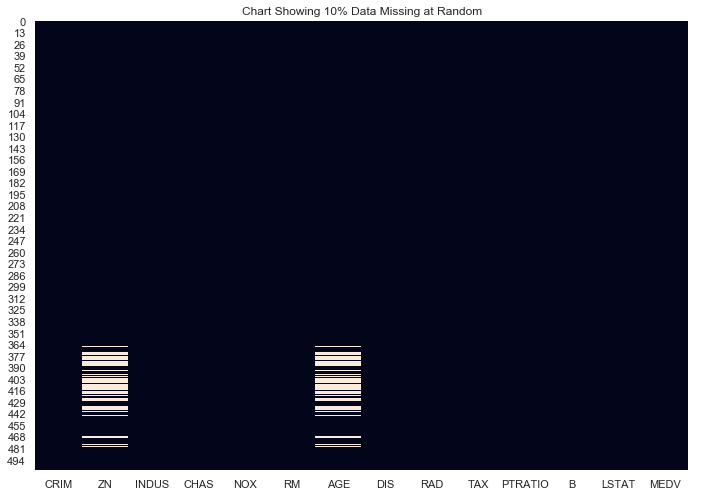

In [29]:
sns.heatmap(df_missing1.isnull(), cbar=False).set_title('Chart Showing 10% Data Missing at Random')

In [32]:
y1 = df_missing1['MEDV']

X1 = df_missing1.drop('MEDV', axis = 1)

X1_train, X1_test, y1_train, y1_test = train_test_split(X1, y1,test_size=0.3, random_state=42)
pipeline.fit(X1_train, y1_train)
y_pred = pipeline.predict(X1_test)
percentage = 0.1 * 100
print("score for data with {}% of data missing at randon is {}".format(percentage,pipeline.score(X1_test, y1_test)))

score for data with 10.0% of data missing at randon is 0.7075488815772584


101 506


Text(0.5, 1.0, 'Chart Showing 20% Data Missing at Random')

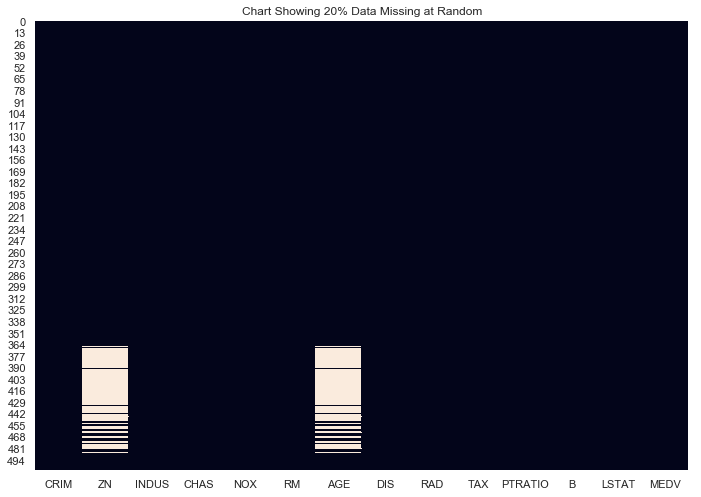

In [33]:
df_missing2 = createMAR(boston, 0.2)
sns.heatmap(df_missing2.isnull(), cbar=False).set_title('Chart Showing 20% Data Missing at Random')

In [34]:
y2 = df_missing2['MEDV']

X2 = df_missing2.drop('MEDV', axis = 1)

X2_train, X2_test, y2_train, y2_test = train_test_split(X2, y2,test_size=0.3, random_state=42)
pipeline.fit(X2_train, y2_train)
y2_pred = pipeline.predict(X2_test)
percentage = 0.2 * 100
print("score for data with {}% of data missing at randon is {}".format(percentage,pipeline.score(X2_test, y2_test)))

score for data with 20.0% of data missing at randon is 0.7089956094126892


152 506


Text(0.5, 1.0, 'Chart Showing 30% Data Missing at Random')

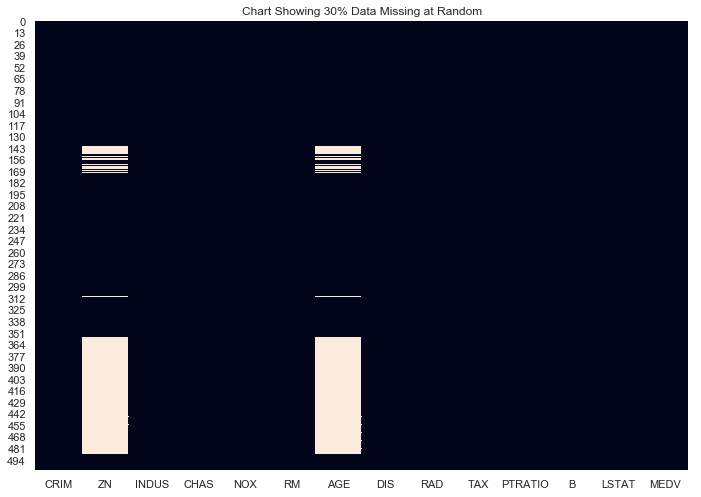

In [35]:
df_missing3 = createMAR(boston, 0.3)
sns.heatmap(df_missing3.isnull(), cbar=False).set_title('Chart Showing 30% Data Missing at Random')


In [36]:
y3 = df_missing3['MEDV']

X3 = df_missing3.drop('MEDV', axis = 1)

X3_train, X3_test, y3_train, y3_test = train_test_split(X3, y3,test_size=0.3, random_state=42)
pipeline.fit(X3_train, y3_train)
y3_pred = pipeline.predict(X3_test)
percentage = 0.3 * 100
print("score for data with {}% of data missing at randon is {}".format(percentage,pipeline.score(X3_test, y3_test)))

score for data with 30.0% of data missing at randon is 0.7108036581175519


## Step 4

Create a Missing Not at Random pattern in which 25% of the data is missing for a single column. Impute your data, fit the results and compare to a baseline.

To simulate a missing not at random, the  top 25% of AGE column was replaced with NAN. Our reasoning for that is houses that

have aged more will have residents that are most likely not willing to participate in the study.

In [37]:
def createMNAR(df, percentage):
    dataCount = len(df)
    perc = round(percentage * dataCount)
    print(perc,dataCount)
    topN = df.nlargest(perc, 'AGE')
    minValue = topN.AGE.min()
    df['AGE'].loc[df['AGE'] > minValue ] = np.nan
    return df

126 506


Text(0.5, 1.0, 'Chart Showing 25% Data Missing Not at Random')

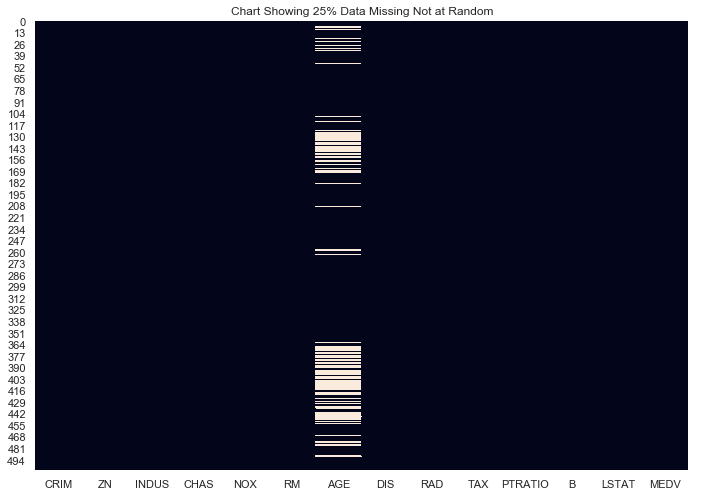

In [38]:
df_Agemissing = createMNAR(boston, 0.25)
sns.heatmap(df_Agemissing.isnull(), cbar=False).set_title('Chart Showing 25% Data Missing Not at Random')

In [39]:
y25 = df_Agemissing['MEDV']

X25 = df_Agemissing.drop('MEDV', axis = 1)

X25_train, X25_test, y25_train, y25_test = train_test_split(X25, y25,test_size=0.3, random_state=42)
pipeline.fit(X25_train, y25_train)
y3_pred = pipeline.predict(X25_test)
percentage = 0.25 * 100
print("score for data with {}% of data missing at randon is {}".format(percentage,pipeline.score(X25_test, y25_test)))

score for data with 25.0% of data missing at randon is 0.7058422227892067


## Step 5 (Extra Credit) (10 points)

Using the MCMC method, and your data from step 4, What is the difference in performance between imputation via ‘guess’ (mean/median, etc) and MCMC.